In [1]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

#the above imports the plotting library matplotlib

In [2]:
#standard imports
import time
import numpy as np
import h5py


In [3]:
#We're not using the GPU here, so we set the 
#"CUDA_VISIBLE_DEVICES" environment variable to -1
#which tells tensorflow to only use the CPU

import os
os.environ["CUDA_VISIBLE_DEVICES"]="-1"    
import tensorflow as tf

###  Tensors constants

In [4]:
#let's define one-node computation graph -- namely, with a single constant
one = tf.constant(1)

In [5]:
#it's a zero-dimensional tensor -- that is, a scalar
one

<tf.Tensor 'Const:0' shape=() dtype=int32>

In [6]:
#it's type is a tensorflow Tensor object
type(one)

tensorflow.python.framework.ops.Tensor

In [7]:
#it's datatype is integer
one.dtype

tf.int32

In [8]:
#it has a tensor shape, just like numpy arrays or HDF5 datasets
one.shape

TensorShape([])

In [9]:
#this is how we access the shape object as a python list
one.shape.as_list()

[]

In [10]:
#if we do this ...
oneinalist = tf.constant([1])

In [11]:
#... then now we have a vector, with a nontrivial shape 
oneinalist.shape.as_list()
#more on vectors shortly

[1]

In [12]:
#ok, now we're make a three-node computation graph, #
#with two input nodes (the "ones") and an output node (the "two")
two = one + one

In [13]:
three = one + one + one

In [14]:
six = tf.constant(6)
twelve = six + six

In [15]:
thirtysix = twelve * three

In [16]:
#also a tensor
two

<tf.Tensor 'add:0' shape=() dtype=int32>

In [17]:
#still an integer
two.dtype

tf.int32

In [18]:
#ok so now we want to actually look at the values
#in this compuation graph.   To do that we have to "run" the graph
#in a "session".   This is really just a formality. You can mostly
#ignore it's meaning. 

#so create a "session" object
sess = tf.Session()

In [19]:
#now run the first tensor in the session
sess.run(one)
#it has value 1, just like we originally programmed it to

1

In [20]:
#and "two" has the expected value as well
sess.run(two)

2

In [21]:
#to be a little perverted ... 
three = two + two
sess.run(three)

4

In [22]:
#we can do the same things with more complex tensors
#like this vector
testvec = tf.constant([1, 2, 3.3])

In [23]:
#"testvec" is a float value since it had a decimal in its definition
#and it's shape is (3, ) because it is a length-3 vector
testvec

<tf.Tensor 'Const_3:0' shape=(3,) dtype=float32>

In [24]:
#we can't quite do this:
testvec + one
#because of type mismatch

ValueError: Tensor conversion requested dtype float32 for Tensor with dtype int32: 'Tensor("Const:0", shape=(), dtype=int32)'

In [25]:
#but we can "cast" the integer value to float and then add the variables:
newvec = testvec + tf.cast(one, tf.float32)

In [26]:
sess.run(newvec)

array([ 2.        ,  3.        ,  4.30000019], dtype=float32)

In [27]:
#here's a 2-d tensor (a matrix)
testmat = tf.constant([[1, 2, 3], [3.4, 4, 6]])
testmat

<tf.Tensor 'Const_4:0' shape=(2, 3) dtype=float32>

In [28]:
#you can slice tensors in Tensorflow pretty much like in NumPy
#(though there are some differences)

#the first row of testmat
sess.run(testmat[0])

array([ 1.,  2.,  3.], dtype=float32)

In [29]:
#the first column of testmat
sess.run(testmat[:, 0])

array([ 1.       ,  3.4000001], dtype=float32)

In [30]:
#now let's look at a 3-dimensional tensor 

randarray = np.random.uniform(size=(10, 4, 5), low=-1, high=1)
#see, we can use whatever values we want
testtensor = tf.constant(randarray, dtype=tf.float32)

testtensor

<tf.Tensor 'Const_5:0' shape=(10, 4, 5) dtype=float32>

In [31]:
#right, it's a random array, so .... 
sess.run(testtensor)[0]

array([[ 0.56254607, -0.87428725, -0.16549036,  0.23590681, -0.12440996],
       [-0.59855568, -0.26610279, -0.68273956, -0.08641119, -0.54709893],
       [-0.94186467,  0.33926156,  0.1020845 , -0.91909707,  0.51196021],
       [ 0.63844562,  0.63650262, -0.08544823,  0.90852773,  0.33348772]], dtype=float32)

In [32]:
#and you can take its square .... 
sess.run(testtensor**2)[0]

array([[ 0.31645808,  0.76437819,  0.02738706,  0.05565202,  0.01547784],
       [ 0.35826892,  0.0708107 ,  0.4661333 ,  0.00746689,  0.29931724],
       [ 0.88710904,  0.11509841,  0.01042124,  0.84473944,  0.26210326],
       [ 0.4076128 ,  0.4051356 ,  0.0073014 ,  0.82542264,  0.11121406]], dtype=float32)

In [33]:
testtensor**2

<tf.Tensor 'pow_1:0' shape=(10, 4, 5) dtype=float32>

In [34]:
tf.reduce_sum(testtensor**2, axis=0)

<tf.Tensor 'Sum:0' shape=(4, 5) dtype=float32>

### Tensor Operations

In [35]:
#let's create some input data
x = tf.range(-10, 10, .1)

In [36]:
#this is a tensor, of course
x

<tf.Tensor 'range:0' shape=(200,) dtype=float32>

In [37]:
#now let's compute the sine function on the input data
y = tf.sin(x)

In [38]:
#output is also a tensor
y

<tf.Tensor 'Sin:0' shape=(200,) dtype=float32>

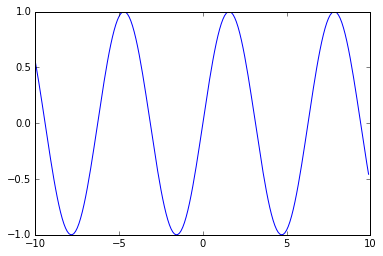

In [39]:
#actually get the concrete values
xvals = sess.run(x)
yvals = sess.run(y)  

#plot them
plt.plot(xvals, yvals)

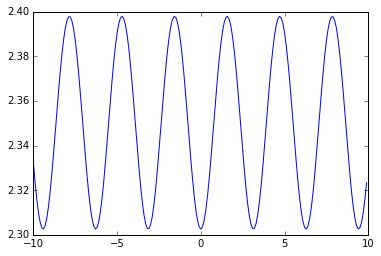

In [40]:
#we can do a more complex function easily
x = tf.range(-10, 10, .1)
y = tf.sin(x)
z = y**2 + 10
w = tf.log(z)
plt.plot(sess.run(x), sess.run(w))

#### Matrix multiplication

In [41]:
#let's recall a little about matrix multiplication in NumPy
rng = np.random.RandomState(0) #create some random data
randarr = rng.uniform(size=(10, 4))
randarr2 = rng.uniform(size=(10, 4))

multarr = randarr * randarr2 #<-- this is elementwise multiplication in numpy
multarr.shape

(10, 4)

In [42]:
#but matrix multiplication ("dot product") clearly doesn't work for these two matrices
multarr = np.dot(randarr, randarr2)
#... because of shape mismatch

ValueError: shapes (10,4) and (10,4) not aligned: 4 (dim 1) != 10 (dim 0)

In [43]:
randarr3 = np.random.RandomState(0).uniform(size=(20, 10))

#this is matrix multiplication in numpy (like we've seen before)
multarr = np.dot(randarr3, randarr)  
multarr.shape

(20, 4)

In [44]:
tf.multiply

<function tensorflow.python.ops.math_ops.multiply>

In [45]:
#now let's do the same thing in tensorflow

mat = tf.constant(randarr)
mat2 = tf.constant(randarr2)
mat3 = tf.constant(randarr3)

mat * mat2  #element-wise multiplcation of the tensorflow objects


<tf.Tensor 'mul_1:0' shape=(10, 4) dtype=float64>

In [46]:
sess.run(mat * mat2 - tf.multiply(mat, mat2))

array([[ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.]])

In [47]:
sess.run(mat + mat2 - tf.add(mat, mat2))

array([[ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.]])

In [48]:
#matrix multiplication in tensorflow is called "matmul"
tf.matmul(mat3, mat)

<tf.Tensor 'MatMul:0' shape=(20, 4) dtype=float64>

#### Image convolution

In [49]:
from PIL import Image

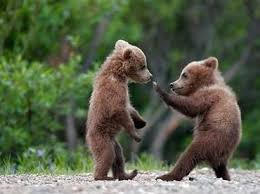

In [50]:
#let's open our two bears image
im = Image.open('two bears.jpg')
im

In [51]:
#let's make it into a float32 array
imarray = np.asarray(im).astype(np.float32)  #numpy
imtensor = tf.constant(imarray)   #now it's in tensorflow
imtensor.shape.as_list()

[194, 260, 3]

In [52]:
#we're going to apply a constant filter to the image on all channels
#the filter is of the form (height, width, in_channels, out_channels)

k = 2  #filter size of 2

#we structure blocks of 3x3 with ones matrices on the diagonal
#and zeros on the off diagonal.   the 3x3 is due to the fcat 
#that images have 3 input channels and want to make an output that is also in image

filterarray = np.array([[np.ones((k, k)), np.zeros((k, k)), np.zeros((k, k))], 
                         [np.zeros((k, k)), np.ones((k, k)), np.zeros((k, k))], 
                         [np.zeros((k, k)), np.zeros((k, k)), np.ones((k, k))]]) / k**2
filterarray = filterarray.transpose(2, 3, 0, 1) #get the dimensions in the right order (height, width, inchannel, outchannel)

In [53]:
filterarray.shape

(2, 2, 3, 3)

In [54]:
#this is a 2x2 constant filter
filterarray[:, :, 1, 1]

array([[ 0.25,  0.25],
       [ 0.25,  0.25]])

In [55]:
filterarray[:, :, 0, 1]

array([[ 0.,  0.],
       [ 0.,  0.]])

('shape = ', (193, 259, 3))


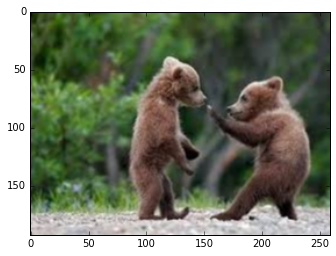

In [56]:
#ok let's apply 2d convolution using this filter
out = tf.nn.conv2d(imtensor[np.newaxis, :], 
                   filterarray,
                   strides=[1, 1, 1, 1],
                   padding='VALID')

#get the output value
outval = sess.run(out)[0]
print('shape = ', outval.shape)
#and look at it
plt.imshow(outval.astype(np.uint8))

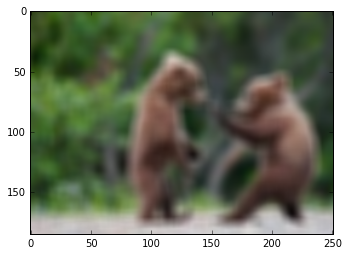

In [57]:
k = 10  #see, if we increase the size of the filter, the image gets blurrier

filterarray = np.array([[np.ones((k, k)), np.zeros((k, k)), np.zeros((k, k))], 
                         [np.zeros((k, k)), np.ones((k, k)), np.zeros((k, k))], 
                         [np.zeros((k, k)), np.zeros((k, k)), np.ones((k, k))]]) / k**2
filterarray = filterarray.transpose(2, 3, 0, 1)

out = tf.nn.conv2d(imtensor[np.newaxis], filterarray, strides=[1, 1, 1, 1], padding='VALID')
outval = sess.run(out)[0]
plt.imshow(outval.astype(np.uint8))

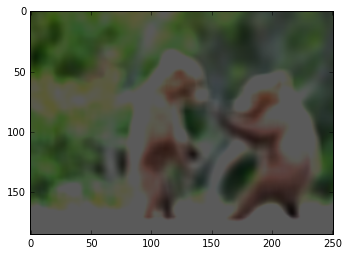

In [58]:
#here we take minimum operation after the convolution -- look at the visual effect it has
k = 10
filterarray = np.array([[np.ones((k, k)), np.zeros((k, k)), np.zeros((k, k))], 
                         [np.zeros((k, k)), np.ones((k, k)), np.zeros((k, k))], 
                         [np.zeros((k, k)), np.zeros((k, k)), np.ones((k, k))]]) / k**2
filterarray = filterarray.transpose(2, 3, 0, 1)

out1 = tf.nn.conv2d(imtensor[np.newaxis], filterarray, strides=[1, 1, 1, 1], padding='VALID')
out2 = tf.minimum(out1, 90)
outval = sess.run(out2)[0]
plt.imshow(outval.astype(np.uint8))

#... in fact, this is (a little bit) like what the output of internal layers of 
#deep nets look like when operating on images

('shape = ', (185, 251, 3))


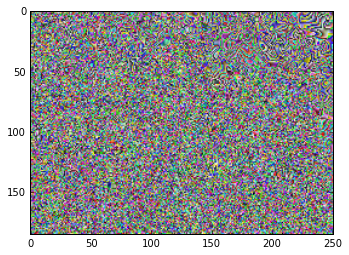

In [59]:
#random filers make what looks like garbage
k = 10
filterarray = np.random.RandomState(0).uniform(size=(k, k, 3, 3))
out = tf.nn.conv2d(imtensor[np.newaxis], filterarray, strides=[1, 1, 1, 1], padding='VALID')
outval = sess.run(out)[0]
print('shape = ', outval.shape)
plt.imshow(outval.astype(np.uint8))

('Shape=', [194, 260])


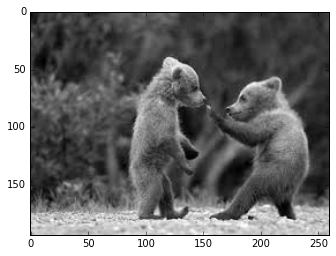

In [60]:
#just for illustration purposes, let's do some matrix multiplication
#the red channel (first channel) is just a 2-d matrix
im_chnl0 = imtensor[:, :, 0]
print('Shape=', im_chnl0.shape.as_list())
plt.imshow(sess.run(im_chnl0), cmap='gray')

In [61]:
#let's multiple our image matrix by a matrix of constant value
onemat = 1./100 * tf.ones(shape=(260, 4))
sess.run(onemat[0])

array([ 0.01,  0.01,  0.01,  0.01], dtype=float32)

In [62]:
#actually do the multiplication
outmat = tf.matmul(im_chnl0 , onemat)
outmat.shape.as_list()

[194, 4]

In [63]:
#adding 3 to show it can be done
outmat1 = tf.matmul(im_chnl0 , onemat) + 3

In [64]:
sess.run(outmat[0])

array([ 183.01005554,  183.01005554,  183.01005554,  183.01005554], dtype=float32)

In [65]:
#see, we added 3....
sess.run(outmat1[0])

array([ 186.01005554,  186.01005554,  186.01005554,  186.01005554], dtype=float32)

### Tensor Variables

In [66]:
#construct a scalar (0-dimensional) variable with name "x"
eks = tf.get_variable('x', shape=(), dtype=tf.float32)

In [67]:
#Yep, it's a variable
eks

<tf.Variable 'x:0' shape=() dtype=float32_ref>

In [68]:
eks.name

u'x:0'

In [69]:
#we can do operations on variables just like we can on constant tensors
why = eks**2

In [70]:
#"why" isn't a variable ... it's just a tensor
why
#this is because "why" doesn't care whether its input was a variable or a constant, it's
#still going to do the same operation regardless. 

<tf.Tensor 'pow_4:0' shape=() dtype=float32>

In [71]:
#this doesn't work yet because eks's value isn't actually specified anyhwere
sess.run(eks)

FailedPreconditionError: Attempting to use uninitialized value x
	 [[Node: _retval_x_0_0 = _Retval[T=DT_FLOAT, index=0, _device="/job:localhost/replica:0/task:0/device:CPU:0"](x)]]

In [72]:
#we specify it to the runner by using a "feed_dict"
sess.run(eks, feed_dict={eks: 8})

array(8.0, dtype=float32)

In [73]:
#we can get anything computed from "eks" (such as "why") as long as we specify
#the value for eks.   this is like "feeding the roots" of the computational graph
#and then looking at some downstream leaf's value
sess.run(why, feed_dict={eks: 8})

64.0

In [74]:
zee = why + 3

In [75]:
sess.run(zee, feed_dict={eks: 8})

67.0

In [76]:
sess.run(zee, feed_dict={why: 8})

11.0

In [77]:
sess.run(zee, feed_dict={zee: 8})

array(8.0, dtype=float32)

In [78]:
#not allowed to use the same variable name willy-nilly ("x" was already used above)
xarr = tf.get_variable('x', shape=(10, 4, 5), dtype=tf.float32)

ValueError: Variable x already exists, disallowed. Did you mean to set reuse=True or reuse=tf.AUTO_REUSE in VarScope? Originally defined at:

  File "<ipython-input-66-26632c5060aa>", line 2, in <module>
    eks = tf.get_variable('x', shape=(), dtype=tf.float32)
  File "/usr/local/lib/python2.7/dist-packages/IPython/core/interactiveshell.py", line 2881, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/usr/local/lib/python2.7/dist-packages/IPython/core/interactiveshell.py", line 2821, in run_ast_nodes
    if self.run_code(code, result):


In [79]:
#so let's call it something else
x_arr = tf.get_variable('x_arr', shape=(10, 4, 5), dtype=tf.float32)
#... and make in a 3-tensor

In [80]:
#of course, we can still compute the square
y_arr = x_arr**2

In [81]:
#and get the actual value
randarray = np.random.uniform(size=(10, 4, 5), low=-1, high=1)

y_val = sess.run(y_arr, feed_dict = {x_arr: randarray})

In [82]:
y_val[0]

array([[ 0.67514372,  0.60161114,  0.48406971,  0.1597174 ,  0.83723706],
       [ 0.30268133,  0.60071754,  0.22192249,  0.08965681,  0.09227741],
       [ 0.29598868,  0.20112868,  0.04500304,  0.78373635,  0.00265223],
       [ 0.01524266,  0.00238395,  0.03610126,  0.22859401,  0.09538959]], dtype=float32)

### Constructing something simple -- SVM hinge loss

In [83]:
#ok let's load the neural data 
DATA_PATH = "/home/chengxuz/Class/psych253_2018/data/ventral_neural_data.hdf5"
Ventral_Dataset = h5py.File(DATA_PATH)

categories = Ventral_Dataset['image_meta']['category'][:]   #array of category labels for all images  --> shape == (5760,)
unique_categories = np.unique(categories)                #array of unique category labels --> shape == (8,)

Neural_Data = Ventral_Dataset['time_averaged_trial_averaged'][:]

num_neurons = Neural_Data.shape[1]
num_categories = 8 

In [84]:
categories[[0, 1200, 2304]]

array(['Fruits', 'Animals', 'Cars'],
      dtype='|S7')

In [85]:
#we'll construct 8 one-vs-all binary-valued vectors
category_matrix = np.array([categories == c for 
                             c in unique_categories]).T.astype(int)

In [86]:
#... one for each category
category_matrix.shape

(5760, 8)

In [87]:
#right, this first image is a fruit (5th category)
category_matrix[0]

array([0, 0, 0, 0, 0, 1, 0, 0])

In [88]:
#we're not going to process all the images at once, so we batch them up
#... the size of the batches is going to be 256
batch_size = 256

In [89]:
#let's set up some our key variables
weights = tf.get_variable('weights', 
                          shape=(num_neurons, num_categories),
                          dtype=tf.float32)

bias = tf.get_variable('bias', 
                       shape=(num_categories,),
                       dtype=tf.float32)

In [90]:
#and placeholder variables as roots of the computation graph
#to receive the inputs
neural_data = tf.get_variable('neural_data',
                              shape=(batch_size, num_neurons),
                              dtype=tf.float32)

In [91]:
category_labels = tf.get_variable('category_labels',
                                 shape=(batch_size, num_categories),
                                 dtype=tf.float32)

In [92]:
#out margins formula is really simple
margins = tf.matmul(neural_data, weights) + bias

In [93]:
#as is the SVM hinge loss
hinge_loss = tf.maximum(0., 1. - category_labels * margins)

In [94]:
#let's actually compute it
#to do that we have to stick in some values for the weights, bias, and data
rng = np.random.RandomState(0)

initial_weights = rng.uniform(size=(num_neurons, num_categories),
                              low=-1,
                              high=1)

initial_bias = np.zeros((num_categories,))
                             
data_batch = Neural_Data[0: batch_size]
label_batch = category_matrix[0: batch_size]
        

In [95]:
loss_val = sess.run(hinge_loss, feed_dict={weights: initial_weights,
                                           bias: initial_bias,
                                           neural_data: data_batch,
                                           category_labels: label_batch})
loss_val.shape
#ok it's at least the right shape (data_batch, num_categories)

(256, 8)

In [96]:
loss_val[0]

array([ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        5.32714176,  1.        ,  1.        ], dtype=float32)

### Actually using trainable variables

In [97]:
#as we'll see more next time its useful to separate the parameters
#of the model from the real "data" inputs and make the parameters
#(such as the weights and biases) initialize without feeding using the feed_dict

#let's use the tensorflow random uniform sampler to initialize weight balues
initial_weights = tf.random_uniform(shape=(num_neurons, num_categories),
                  minval=-1,
                  maxval=1,
                  seed=0)

In [98]:
sess.run(initial_weights[0])

array([-0.79827476,  0.9403336 ,  0.69752836, -0.90343738, -0.90295386,
        0.55494928,  0.688936  , -0.16585016], dtype=float32)

In [99]:
#see if you run it twice without resetting the seed you get different values
sess.run(initial_weights[0])

array([ 0.03105211,  0.75788879,  0.08570004,  0.44977117, -0.61937523,
        0.8424499 ,  0.1591475 ,  0.41482568], dtype=float32)

In [100]:
initial_bias = tf.zeros(shape=(num_categories,))

In [101]:
#same idea as before -- we're initializing the weights but now with an 
#initializer as opposed to by hand
weights = tf.get_variable('weights_for_real', 
                           dtype=tf.float32,
                           initializer=initial_weights)
                         
bias = tf.get_variable('bias_for_real', 
                       dtype=tf.float32,
                       initializer=initial_bias)

In [102]:
initialize_op = tf.global_variables_initializer()
sess.run(initialize_op)
sess.run(weights)

array([[-0.86808681,  0.73820186, -0.9922967 , ..., -0.18857431,
         0.12306046,  0.18952942],
       [ 0.11023068, -0.15810513, -0.21550941, ...,  0.34239602,
         0.07066655,  0.48793697],
       [ 0.27729702,  0.44688106,  0.74186563, ..., -0.43696022,
        -0.83818936, -0.32810926],
       ..., 
       [-0.90881634,  0.96538019, -0.03059149, ..., -0.11946988,
        -0.65008259, -0.96437216],
       [ 0.75305009,  0.25409794,  0.16923451, ...,  0.32856083,
        -0.18022251, -0.92924261],
       [-0.66314578, -0.15705562, -0.67897224, ...,  0.56468797,
        -0.68454051, -0.77280378]], dtype=float32)

In [103]:
sess.run(weights)

array([[-0.86808681,  0.73820186, -0.9922967 , ..., -0.18857431,
         0.12306046,  0.18952942],
       [ 0.11023068, -0.15810513, -0.21550941, ...,  0.34239602,
         0.07066655,  0.48793697],
       [ 0.27729702,  0.44688106,  0.74186563, ..., -0.43696022,
        -0.83818936, -0.32810926],
       ..., 
       [-0.90881634,  0.96538019, -0.03059149, ..., -0.11946988,
        -0.65008259, -0.96437216],
       [ 0.75305009,  0.25409794,  0.16923451, ...,  0.32856083,
        -0.18022251, -0.92924261],
       [-0.66314578, -0.15705562, -0.67897224, ...,  0.56468797,
        -0.68454051, -0.77280378]], dtype=float32)

In [104]:
#have to reconstruct the margins and loss now that "weights" and "bias" 
#have been redefined

margins = tf.matmul(neural_data, weights) + bias

hinge_loss = tf.maximum(0., 1. - category_labels * margins)

In [106]:
#ok we should be able to run this without feeding the parameters

loss_val = sess.run(hinge_loss, feed_dict={neural_data: data_batch,
                                           category_labels: label_batch})
loss_val.shape

(256, 8)

### Getting gradients

In [107]:
#we want to get back the variable named "x" 
#that we defined before .... here's how to do it 
#without getting the "already define" error

with tf.variable_scope('', reuse=True):
    x = tf.get_variable('x')

In [108]:
#define an operation on top of the variable "x"
y = x**2

In [109]:
#let's compute the gradient of y wrt to x
grad = tf.gradients(y, x)

In [110]:
grad[0]

<tf.Tensor 'gradients/pow_6_grad/Reshape:0' shape=() dtype=float32>

In [111]:
sess.run(grad, feed_dict = {x: 0})

[0.0]

In [112]:
sess.run(grad, feed_dict = {x: 1})

[2.0]

In [113]:
sess.run(grad, feed_dict = {x: 2})

[4.0]

In [114]:
sess.run(grad, feed_dict = {x: 3})

[6.0]

In [115]:
x_arr = tf.get_variable('x_arr2', shape=(100,), dtype=tf.float32)

In [116]:
y_arr = x_arr**2

In [117]:
grad_array = tf.gradients(y_arr, x_arr)

In [118]:
grad_array

[<tf.Tensor 'gradients_1/pow_7_grad/Reshape:0' shape=(100,) dtype=float32>]

In [119]:
x_vals = np.arange(-5, 5, .1)
funcval = sess.run(y_arr, feed_dict = {x_arr: x_vals})
gradval = sess.run(grad_array, feed_dict = {x_arr: x_vals})[0]

In [120]:
type([y_arr, grad_array])

list

In [121]:
#or we could have equally well have done
funcval, gradval = sess.run([y_arr, grad_array], feed_dict={x_arr: x_vals})
gradval = gradval[0]

In [122]:
#or we could have equally well have done
out = sess.run({'funcval': y_arr, 'gradval': grad_array}, feed_dict={x_arr: x_vals})
funcval = out['funcval']
gradval = out['gradval'][0]

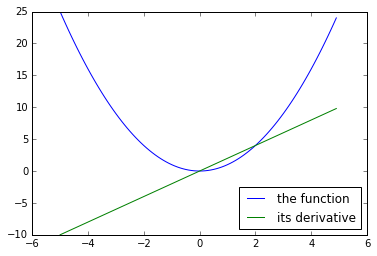

In [123]:
plt.plot(x_vals, funcval, label='the function')
plt.plot(x_vals, gradval, label='its derivative')
plt.legend(loc='lower right')

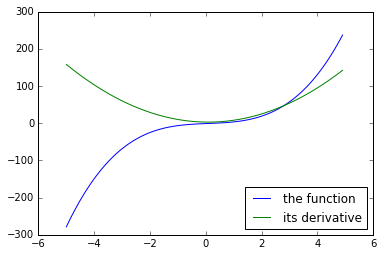

In [124]:
#this is the tensorflow "model" definition
y_arr = 2*x_arr**3 - .5*x_arr**2 + 3*x_arr - 1

#and here's the model's derivative
grad_array = tf.gradients(y_arr, x_arr)

#now let's stick in some values
x_vals = np.arange(-5, 5, .1)
funcval = sess.run(y_arr, feed_dict = {x_arr: x_vals})
gradval = sess.run(grad_array, feed_dict = {x_arr: x_vals})[0]

#and plot it
plt.plot(x_vals, funcval, label='the function')
plt.plot(x_vals, gradval, label='its derivative')
plt.legend(loc='lower right')

In [125]:
x_arr

<tf.Variable 'x_arr2:0' shape=(100,) dtype=float32_ref>

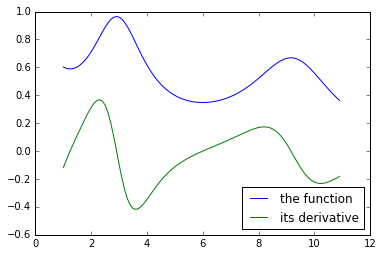

In [126]:
y = x_arr**.5
z = tf.log(tf.exp(tf.sin(y) + tf.cos(2*y)) + 1)
w = z / (y + tf.cos(x_arr))

grad_array = tf.gradients(w, x_arr)

x_vals = np.arange(1, 11, .1)
funcval, gradval = sess.run([w, grad_array], feed_dict = {x_arr: x_vals})
gradval = gradval[0]

plt.plot(x_vals, funcval, label='the function')
plt.plot(x_vals, gradval, label='its derivative')
plt.legend(loc='lower right')

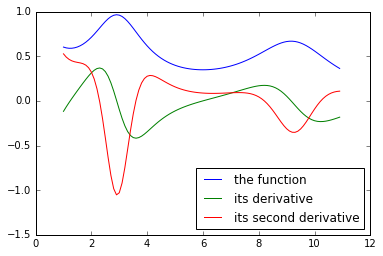

In [127]:
y = x_arr**.5
z = tf.log(tf.exp(tf.sin(y) + tf.cos(2*y)) + 1)
w = z / (y + tf.cos(x_arr))

grad_array = tf.gradients(w, x_arr)
grad2_array = tf.gradients(grad_array, x_arr)

x_vals = np.arange(1, 11, .1)
funcval, gradval, grad2val = sess.run([w, grad_array, grad2_array], feed_dict = {x_arr: x_vals})
gradval = gradval[0]
grad2val = grad2val[0]

plt.plot(x_vals, funcval, label='the function')
plt.plot(x_vals, gradval, label='its derivative')
plt.plot(x_vals, grad2val, label='its second derivative')
plt.legend(loc='lower right')

In [128]:
grad_array[0].name

u'gradients_4/AddN_1:0'

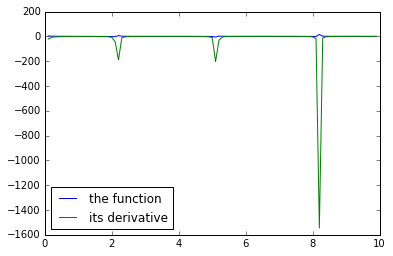

In [129]:
y = x_arr**(.5)
z = tf.log(tf.exp(tf.sin(y) + tf.cos(2*y)) + 1)
w = z / (y + tf.tan(x_arr))

grad_array = tf.gradients(w, x_arr)

x_vals = np.arange(0, 10, .1)
funcval = sess.run(w, feed_dict = {x_arr: x_vals})
gradval = sess.run(grad_array, feed_dict = {x_arr: x_vals})[0]

plt.plot(x_vals, funcval, label='the function')
plt.plot(x_vals, gradval, label='its derivative')
plt.legend(loc='lower left')

In [130]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [131]:
xa = tf.get_variable('var_x', shape=(40000,), dtype=tf.float32)
ya = tf.get_variable('var_y', shape=(40000,), dtype=tf.float32)

In [132]:
za = xa**2 + ya**2

In [133]:
grad_array = tf.gradients(za, [xa, ya])

In [134]:
#derivative wrt the first variable
grad_array[0]

<tf.Tensor 'gradients_7/pow_13_grad/Reshape:0' shape=(40000,) dtype=float32>

In [135]:
#derivative wrt the second variable
grad_array[1]

<tf.Tensor 'gradients_7/pow_14_grad/Reshape:0' shape=(40000,) dtype=float32>

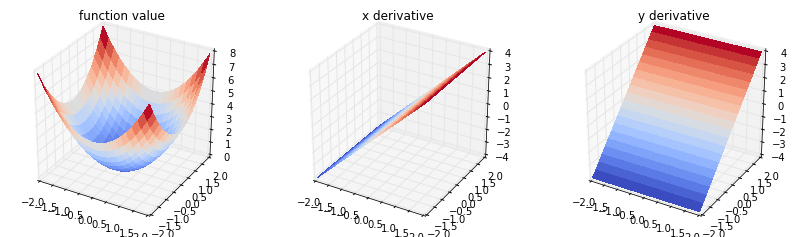

In [136]:
za = xa**2 + ya**2
grad_array = tf.gradients(za, [xa, ya])

x_vals = np.arange(-2, 2, .02)
y_vals = np.arange(-2, 2, .02)
xv, yv = np.meshgrid(x_vals, y_vals)
funcval = sess.run(za, feed_dict = {xa: xv.ravel(), ya: yv.ravel()})
gradval = sess.run(grad_array, feed_dict = {xa: xv.ravel(), ya: yv.ravel()})

fig = plt.figure(figsize=(14, 4))
ax = plt.subplot(1, 3, 1, projection='3d')
ax.plot_surface(xv, yv, funcval.reshape((200, 200)), cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
plt.title('function value')
ax = plt.subplot(1, 3, 2, projection='3d')
ax.plot_surface(xv, yv, gradval[0].reshape((200, 200)), cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
plt.title('x derivative')
ax = plt.subplot(1, 3, 3, projection='3d')
ax.plot_surface(xv, yv, gradval[1].reshape((200, 200)), cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
plt.title('y derivative')



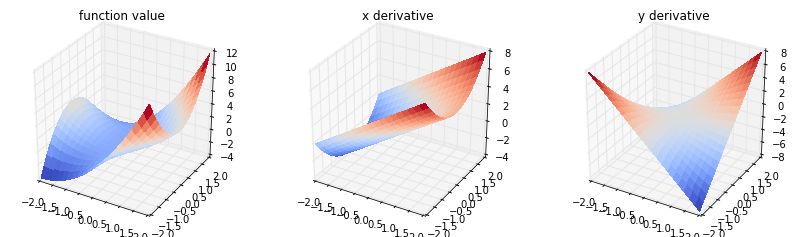

In [137]:
za = xa**2 + ya**2 * xa
grad_array = tf.gradients(za, [xa, ya])

x_vals = np.arange(-2, 2, .02)
y_vals = np.arange(-2, 2, .02)
xv, yv = np.meshgrid(x_vals, y_vals)
funcval = sess.run(za, feed_dict = {xa: xv.ravel(), ya: yv.ravel()})
gradval = sess.run(grad_array, feed_dict = {xa: xv.ravel(), ya: yv.ravel()})

fig = plt.figure(figsize=(14, 4))
ax = plt.subplot(1, 3, 1, projection='3d')
ax.plot_surface(xv, yv, funcval.reshape((200, 200)), cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
plt.title('function value')
ax = plt.subplot(1, 3, 2, projection='3d')
ax.plot_surface(xv, yv, gradval[0].reshape((200, 200)), cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
plt.title('x derivative')
ax = plt.subplot(1, 3, 3, projection='3d')
ax.plot_surface(xv, yv, gradval[1].reshape((200, 200)), cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
plt.title('y derivative')



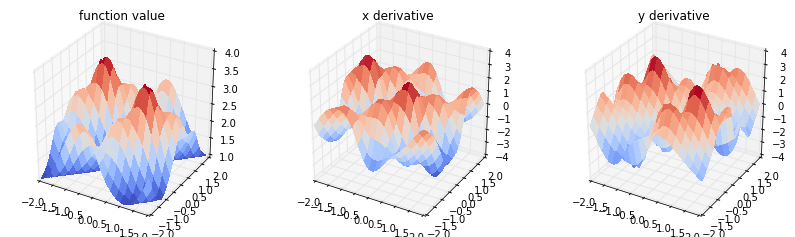

In [138]:
za = tf.cosh((3 + tf.cos(xa+2*ya)**3)**.5 * tf.sin(ya-xa))

grad_array = tf.gradients(za, [xa, ya])

x_vals = np.arange(-2, 2, .02)
y_vals = np.arange(-2, 2, .02)
xv, yv = np.meshgrid(x_vals, y_vals)
funcval = sess.run(za, feed_dict = {xa: xv.ravel(), ya: yv.ravel()})
gradval = sess.run(grad_array, feed_dict = {xa: xv.ravel(), ya: yv.ravel()})

fig = plt.figure(figsize=(14, 4))
ax = plt.subplot(1, 3, 1, projection='3d')
ax.plot_surface(xv, yv, funcval.reshape((200, 200)), cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
plt.title('function value')
ax = plt.subplot(1, 3, 2, projection='3d')
ax.plot_surface(xv, yv, gradval[0].reshape((200, 200)), cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
plt.title('x derivative')
ax = plt.subplot(1, 3, 3, projection='3d')
ax.plot_surface(xv, yv, gradval[1].reshape((200, 200)), cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
plt.title('y derivative')
